In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import random

In [2]:
education = pd.read_csv('combined_csv.csv')

In [3]:
education.head()

,Newspaper,Heading,Date,Time,URL
0,Hindiustan Times,UPSC civil services 2019 prelims on June 2: Re...,2019-05-26,09:12:00,https://www.hindustantimes.com/education/upsc-...
1,Hindiustan Times,Navodaya Vidyalaya NVS JNVST class 6th result ...,2019-05-26,08:36:00,https://www.hindustantimes.com/education/navod...
2,Hindiustan Times,West Bengal 12th Result 2019: WBCHSE Uccha Mad...,2019-05-26,12:35:00,https://www.hindustantimes.com/education/west-...
3,Hindiustan Times,West Bengal 12th Result 2019: WBCHSE Uccha Mad...,2019-05-26,12:35:00,https://www.hindustantimes.com/education/west-...
4,Hindiustan Times,NTA UGC- NET admit card 2019 to release tomor...,2019-05-26,12:24:00,https://www.hindustantimes.com/education/nta-u...


In [4]:
education.shape

(166, 5)

In [5]:
df=education[education['Date']=='2019-05-25']
Heading = df['Heading']

In [6]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.decomposition import TruncatedSVD

In [7]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
stopset = set(stopwords.words('english'))

In [9]:
#### Delete This
#from sklearn.datasets import fetch_20newsgroups
#categories = ['rec.sport.baseball']
#dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42, categories=categories)
#corpus=dataset.data


Tokenizing and Stemming

In [10]:
import nltk
import re

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [12]:
def tokenize_and_stem(text):
   
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []

    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):

    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
   
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [13]:
Heading_stemmed = []
Heading_tokenized = []
for i in Heading:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'Heading', tokenize/stem
    Heading_stemmed.extend(allwords_stemmed) #extend the 'Heading_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    Heading_tokenized.extend(allwords_tokenized)

In [14]:
 Heading_tokenized[:10]    # 10 out of all

['karnataka',
 'common',
 'entrance',
 'test',
 'kcet',
 'result',
 'out',
 'today',
 'direct',
 'link']

In [15]:
Heading_stemmed[:10]   # 10 out of all

['karnataka',
 'common',
 'entranc',
 'test',
 'kcet',
 'result',
 'out',
 'today',
 'direct',
 'link']

In [16]:
words_frame = pd.DataFrame({'words': Heading_tokenized}, index = Heading_stemmed)

In [17]:
words_frame.head(10)

,words
karnataka,karnataka
common,common
entranc,entrance
test,test
kcet,kcet
result,result
out,out
today,today
direct,direct
link,link


TF-IDF

In [18]:
##Important : min_df
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,4))

In [19]:
tfidf_matrix = vectorizer.fit_transform(Heading)

In [20]:
print(tfidf_matrix.shape)

(35, 827)


In [21]:
print(tfidf_matrix[0])

  (0, 477)	0.13468733704208752
  (0, 235)	0.16388708378168992
  (0, 336)	0.14680632690846768
  (0, 752)	0.14680632690846768
  (0, 484)	0.12528711820301383
  (0, 633)	0.05424531968281827
  (0, 765)	0.12528711820301383
  (0, 306)	0.14680632690846768
  (0, 500)	0.13468733704208752
  (0, 474)	0.16388708378168992
  (0, 151)	0.13468733704208752
  (0, 333)	0.12528711820301383
  (0, 481)	0.16388708378168992
  (0, 236)	0.16388708378168992
  (0, 339)	0.16388708378168992
  (0, 756)	0.16388708378168992
  (0, 485)	0.12528711820301383
  (0, 696)	0.13468733704208752
  (0, 769)	0.16388708378168992
  (0, 308)	0.16388708378168992
  (0, 503)	0.16388708378168992
  (0, 475)	0.16388708378168992
  (0, 152)	0.13468733704208752
  (0, 482)	0.16388708378168992
  (0, 237)	0.16388708378168992
  (0, 340)	0.16388708378168992
  (0, 757)	0.16388708378168992
  (0, 490)	0.16388708378168992
  (0, 697)	0.16388708378168992
  (0, 770)	0.16388708378168992
  (0, 309)	0.16388708378168992
  (0, 504)	0.16388708378168992
  (0, 47

In [22]:
vectorizer.get_feature_names()[:] 

['10th',
 '10th 12th',
 '10th 12th onli',
 '10th 12th onli direct',
 '10th 12th result',
 '10th 12th result date',
 '12th',
 '12th art',
 '12th art commerc',
 '12th art commerc result',
 '12th board',
 '12th hsc',
 '12th hsc general',
 '12th hsc general result',
 '12th hsc result',
 '12th hsc result declar',
 '12th onli',
 '12th onli direct',
 '12th onli direct dio',
 '12th result',
 '12th result date',
 '12th result date time',
 '12th result declar',
 '12th result declar ahsec.nic.in',
 '12th result declar check',
 '12th result gujarat',
 '12th result gujarat board',
 '12th result releas',
 '12th result releas ahsec.nic.in',
 '12th result today',
 '12th result today s',
 'activ',
 'activ download',
 'admiss',
 'admiss applic',
 'admiss applic avail',
 'admiss applic avail msc',
 'admiss registr',
 'admiss registr process',
 'admiss registr process end',
 'admiss seat',
 'admiss seat grab',
 'admit',
 'admit card',
 'admit card releas',
 'admit card releas csbc.bih.nic.in',
 'advanc',


In [23]:
terms = vectorizer.get_feature_names()

Cosine similarity

In [24]:
from sklearn.metrics.pairwise import cosine_similarity


In [25]:
dist = cosine_similarity(tfidf_matrix)

In [26]:
dist.shape

(35, 35)

In [27]:
print(dist)

[[1.         0.02298546 0.00432569 ... 0.00642502 0.0042058  0.12368753]
 [0.02298546 1.         0.00912442 ... 0.00677633 0.         0.        ]
 [0.00432569 0.00912442 1.         ... 0.0336032  0.06959249 0.01934787]
 ...
 [0.00642502 0.00677633 0.0336032  ... 1.         0.00918329 0.05307878]
 [0.0042058  0.         0.06959249 ... 0.00918329 1.         0.01881161]
 [0.12368753 0.         0.01934787 ... 0.05307878 0.01881161 1.        ]]


In [28]:
print(dist[34])

[0.12368753 0.         0.01934787 0.02009685 0.0195447  0.00904401
 0.01283054 0.01795986 0.02006296 0.00959836 0.00471541 0.
 0.00447554 0.07516552 0.00451604 0.0073389  0.03912517 0.01097959
 0.         0.01446499 0.01103025 0.00531976 0.         0.
 0.00464249 0.         0.03383817 1.         0.00555061 0.07389285
 0.02006758 0.00658554 0.05307878 0.01881161 1.        ]


In [29]:
dist[34].sum()

2.645771472672781

## K-Means

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd


### Finding Number of Clusters

In [31]:
n_clusters = list (range (15,20))
min=999
for n in n_clusters:
    km_ss = KMeans(n_clusters=n)
    #km_ss.fit(tfidf_matrix) 
    clusters_ss = km_ss.fit_predict(tfidf_matrix)
    #centers_ss = km_ss.cluster_centers_ 
    score = silhouette_score(dist,clusters_ss)
    if min>score:
        min=score
        n_score=n
    print ("For n = {}, silhouette score is {})".format(n, score))
    

For n = 15, silhouette score is 0.05874415338785342)
For n = 16, silhouette score is 0.05920902435272997)
For n = 17, silhouette score is 0.07846439120248368)
For n = 18, silhouette score is 0.06531663525942605)
For n = 19, silhouette score is 0.06687089634652264)


In [32]:
n_score

15

In [33]:
num_clusters = n_score
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
clusters = km.labels_.tolist()

In [35]:
from sklearn.externals import joblib
joblib.dump(km,  'doc_cluster.pkl')


['doc_cluster.pkl']

In [36]:
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [37]:
df['Cluster'] = clusters

In [38]:
X_dist = km.transform(tfidf_matrix)**2  ###tranform returns distance from centroid
sqddist = X_dist.sum(axis=1).round(2)
df['sqddist'] = sqddist

In [39]:
df


,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
9,Hindiustan Times,Karnataka Common Entrance Test (KCET)2019 Res...,2019-05-25,13:33:00,https://www.hindustantimes.com/education/karna...,2,23.99
10,Hindiustan Times,"Schools can run extra classes for class 10th, ...",2019-05-25,10:45:00,https://www.hindustantimes.com/education/schoo...,4,23.71
11,Hindiustan Times,"Assam AHSEC 12th result 2019 declared, check m...",2019-05-25,09:06:00,https://www.hindustantimes.com/education/assam...,0,23.61
12,Hindiustan Times,"Gujarat GSEB 12th result 2019 declared, check ...",2019-05-25,09:32:00,https://www.hindustantimes.com/education/gujar...,3,23.63
13,Hindiustan Times,Assam board HS Result 2019 today: List of webs...,2019-05-25,10:14:00,https://www.hindustantimes.com/education/assam...,0,23.86
14,Hindiustan Times,Assam HS Result 2019 LIVE updates: AHSEC 12th ...,2019-05-25,09:51:00,https://www.hindustantimes.com/education/assam...,0,23.83
15,Hindiustan Times,Gujarat GSEB 12th HSC result declared 2019 liv...,2019-05-25,12:36:00,https://www.hindustantimes.com/education/gujar...,3,23.74
16,Hindiustan Times,Gujarat GSEB 12th HSC general result 2019 to b...,2019-05-25,07:54:00,https://www.hindustantimes.com/education/gujar...,3,23.71
17,Hindiustan Times,"Assam 12th result 2019 today, here’s how to ch...",2019-05-25,07:09:00,https://www.hindustantimes.com/education/assam...,9,23.72
19,Hindiustan Times,GSEB HSC Result: Gujarat Board 12th arts and c...,2019-05-25,07:53:00,https://www.hindustantimes.com/education/gseb-...,1,23.91


In [40]:
df['Cluster'].value_counts()

1     5
0     5
3     4
2     4
9     3
13    2
12    2
7     2
4     2
14    1
11    1
10    1
8     1
6     1
5     1
Name: Cluster, dtype: int64

## Plotting the points

In [41]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()

In [42]:
cluster_colors = {0: '#1f2df4', 1: '#b3b6c9', 2: '#4ad9ec', 3: '#5e97b9', 4: '#1a7903',
                  5: '#add920', 6: '#cfa5e1', 7: '#2c2255', 8: '#8b0964', 9: '#eb3bdf',
                  10: '#0fcb43', 11: '#cfc0a7', 12: '#4f94bf', 13: '#9d9ce3', 14: '#da7c07'}
cluster_names = {0: 'Cluster 0', 
                 1: 'Cluster 1', 
                 2: 'Cluster 2', 
                 3: 'Cluster 3', 
                 4: 'Cluster 4',
                 5: 'Cluster 5',
                 6: 'Cluster 6',
                 7: 'Cluster 7',
                 8: 'Cluster 8',
                 9: 'Cluster 9',
                 10:'Cluster 10',
                 11:'Cluster 11',
                 12:'Cluster 12',
                 13:'Cluster 13',
                 14:'Cluster 14'}

In [43]:
cluster_names = {}
keys = range(n_score)   ## n_score = number of clusters
for i in keys:
       cluster_names[i] = 'Cluster '+str(i)
print(cluster_names)

{0: 'Cluster 0', 1: 'Cluster 1', 2: 'Cluster 2', 3: 'Cluster 3', 4: 'Cluster 4', 5: 'Cluster 5', 6: 'Cluster 6', 7: 'Cluster 7', 8: 'Cluster 8', 9: 'Cluster 9', 10: 'Cluster 10', 11: 'Cluster 11', 12: 'Cluster 12', 13: 'Cluster 13', 14: 'Cluster 14'}


In [44]:
number_of_colors = n_score

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
cluster_colors={}
for i in range(len(color)):
    cluster_colors[i]=color[i]
print(cluster_colors)

{0: '#EE6343', 1: '#8CC630', 2: '#834FCC', 3: '#5CF811', 4: '#AFC915', 5: '#E4305C', 6: '#23E287', 7: '#F7565A', 8: '#D1D73F', 9: '#84FC74', 10: '#D14BCB', 11: '#453FCD', 12: '#C70D23', 13: '#5A4D50', 14: '#91EBFD'}


In [45]:
type(cluster_colors)

dict

In [46]:
%matplotlib inline 
df_plot= pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=Heading)) 
df_plot.head()

,x,y,label,title
9,-0.008085,-0.003270,2,Karnataka Common Entrance Test (KCET)2019 Res...
10,0.007518,-0.002280,4,"Schools can run extra classes for class 10th, ..."
11,-0.027975,-0.033532,0,"Assam AHSEC 12th result 2019 declared, check m..."
12,0.031244,0.020840,3,"Gujarat GSEB 12th result 2019 declared, check ..."
13,0.018855,-0.022820,0,Assam board HS Result 2019 today: List of webs...


In [47]:
groups = df_plot.groupby('label')

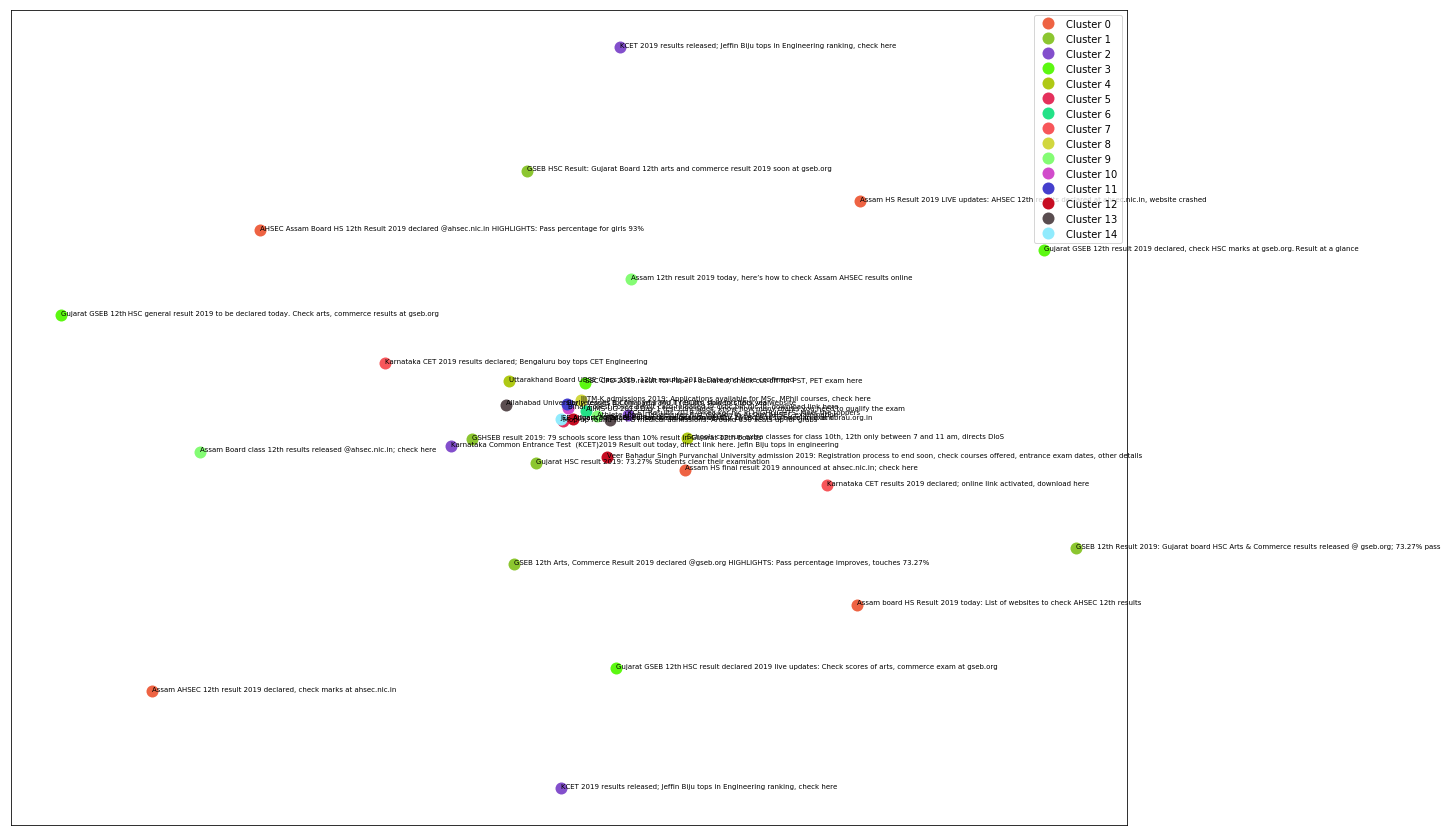

In [48]:
fig, ax = plt.subplots(figsize=(20, 15))

for name,group in groups:
    ax.plot(group.x, group.y, marker='o',linestyle='',ms=12, label=cluster_names[name],color=cluster_colors[name],mec='none')
    ax.set_aspect('auto')   
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.legend(numpoints=1)

for i in range(len(df_plot)):
    ax.text(df_plot.iloc[i]['x'], df_plot.iloc[i]['y'], df_plot.iloc[i]['title'], size=7)

### Closest Point to Centroid

In [49]:
#centers = np.array(km.cluster_centers_)

In [50]:
#data_99 = [ j for j, cluster in enumerate(clusters) if cluster == 1 ]


In [51]:
#cluster_tf_matrix = np.zeros( (  len(data_99) , centers.shape[1] ) )
#cluster_tf_matrix

In [52]:
#for row_num, data in enumerate(data_99):
 #       row = tfidf_matrix[data]
  #      cluster_tf_matrix[row_num] = row

In [53]:
#clostest_data = []
#for i in range(num_clusters):
 #   center = centers[i]
  #  data_i = [ j for j, cluster in enumerate(clusters) if cluster == i ]
    
    
   # cluster_tf_matrix = np.zeros( (  len(data_i) , centers.shape[1] ) )
    #for row_num, data in enumerate(data_i):
     #   row = tfidf_matrix[data]
      #  cluster_tf_matrix[row_num] = row

## Final Result

In [54]:
df.sort_values(by='Cluster')

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
11,Hindiustan Times,"Assam AHSEC 12th result 2019 declared, check m...",2019-05-25,09:06:00,https://www.hindustantimes.com/education/assam...,0,23.61
13,Hindiustan Times,Assam board HS Result 2019 today: List of webs...,2019-05-25,10:14:00,https://www.hindustantimes.com/education/assam...,0,23.86
14,Hindiustan Times,Assam HS Result 2019 LIVE updates: AHSEC 12th ...,2019-05-25,09:51:00,https://www.hindustantimes.com/education/assam...,0,23.83
83,Time of India,Assam HS final result 2019 announced at ahsec....,2019-05-25,09:14:00,https://timesofindia.indiatimes.com/home/educa...,0,24.11
64,Indian Express,AHSEC Assam Board HS 12th Result 2019 declared...,2019-05-25,5:03:52 pm,https://indianexpress.com/article/education/as...,0,23.88
82,Time of India,GSEB 12th Result 2019: Gujarat board HSC Arts ...,2019-05-25,09:16:00,https://timesofindia.indiatimes.com/home/educa...,1,23.77
81,Time of India,Gujarat HSC result 2019: 73.27% Students clear...,2019-05-25,09:23:00,https://timesofindia.indiatimes.com/home/educa...,1,24.23
70,Time of India,GSHSEB result 2019: 79 schools score less than...,2019-05-25,21:40:00,https://timesofindia.indiatimes.com/home/educa...,1,24.16
19,Hindiustan Times,GSEB HSC Result: Gujarat Board 12th arts and c...,2019-05-25,07:53:00,https://www.hindustantimes.com/education/gseb-...,1,23.91
62,Indian Express,"GSEB 12th Arts, Commerce Result 2019 declared ...",2019-05-25,5:06:33 pm,https://indianexpress.com/article/education/gs...,1,23.98


In [55]:
print( "Sqd Dist Mean is {} and Std Deviation is {}".format(df['sqddist'].mean(),df['sqddist'].std()))

Sqd Dist Mean is 23.644285714285715 and Std Deviation is 0.42506252629525454


In [56]:
dist_mean=df['sqddist'].mean()
dist_std=df['sqddist'].std()

In [57]:
df_less = df[df['sqddist']<dist_mean+dist_std] 

In [58]:
df_less=df_less.reset_index().drop(['index'],axis=1)

In [59]:
df_less

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
0,Hindiustan Times,Karnataka Common Entrance Test (KCET)2019 Res...,2019-05-25,13:33:00,https://www.hindustantimes.com/education/karna...,2,23.99
1,Hindiustan Times,"Schools can run extra classes for class 10th, ...",2019-05-25,10:45:00,https://www.hindustantimes.com/education/schoo...,4,23.71
2,Hindiustan Times,"Assam AHSEC 12th result 2019 declared, check m...",2019-05-25,09:06:00,https://www.hindustantimes.com/education/assam...,0,23.61
3,Hindiustan Times,"Gujarat GSEB 12th result 2019 declared, check ...",2019-05-25,09:32:00,https://www.hindustantimes.com/education/gujar...,3,23.63
4,Hindiustan Times,Assam board HS Result 2019 today: List of webs...,2019-05-25,10:14:00,https://www.hindustantimes.com/education/assam...,0,23.86
5,Hindiustan Times,Assam HS Result 2019 LIVE updates: AHSEC 12th ...,2019-05-25,09:51:00,https://www.hindustantimes.com/education/assam...,0,23.83
6,Hindiustan Times,Gujarat GSEB 12th HSC result declared 2019 liv...,2019-05-25,12:36:00,https://www.hindustantimes.com/education/gujar...,3,23.74
7,Hindiustan Times,Gujarat GSEB 12th HSC general result 2019 to b...,2019-05-25,07:54:00,https://www.hindustantimes.com/education/gujar...,3,23.71
8,Hindiustan Times,"Assam 12th result 2019 today, here’s how to ch...",2019-05-25,07:09:00,https://www.hindustantimes.com/education/assam...,9,23.72
9,Hindiustan Times,GSEB HSC Result: Gujarat Board 12th arts and c...,2019-05-25,07:53:00,https://www.hindustantimes.com/education/gseb-...,1,23.91


In [60]:
Result = df_less.sort_values('Cluster').groupby(['Cluster'],as_index=False).apply(lambda x: x.sample(1)) ## picking 1 out of each cluster having mean+std/2 < centroid 


In [61]:
Result = Result.reset_index().drop(['level_0','level_1'],axis=1)

In [62]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
0,Hindiustan Times,Assam HS Result 2019 LIVE updates: AHSEC 12th ...,2019-05-25,09:51:00,https://www.hindustantimes.com/education/assam...,0,23.83
1,Time of India,GSEB 12th Result 2019: Gujarat board HSC Arts ...,2019-05-25,09:16:00,https://timesofindia.indiatimes.com/home/educa...,1,23.77
2,Hindiustan Times,Karnataka Common Entrance Test (KCET)2019 Res...,2019-05-25,13:33:00,https://www.hindustantimes.com/education/karna...,2,23.99
3,Hindiustan Times,"Gujarat GSEB 12th result 2019 declared, check ...",2019-05-25,09:32:00,https://www.hindustantimes.com/education/gujar...,3,23.63
4,Indian Express,"Uttarakhand Board UBSE Class 10th, 12th result...",2019-05-25,5:58:55 pm,https://indianexpress.com/article/education/ut...,4,23.57
5,Time of India,Mop-up round for PG medical admissions: Around...,2019-05-25,15:41:00,https://timesofindia.indiatimes.com/home/educa...,5,22.89
6,Time of India,AIIMS UG 2019 Day 1 test concludes; know how m...,2019-05-25,18:41:00,https://timesofindia.indiatimes.com/home/educa...,6,22.88
7,Time of India,Karnataka CET 2019 results declared; Bengaluru...,2019-05-25,14:00:00,https://timesofindia.indiatimes.com/home/educa...,7,23.42
8,Indian Express,IIITM-K admissions 2019: Applications availabl...,2019-05-25,2:36:39 pm,https://indianexpress.com/article/education/ii...,8,22.80
9,Hindiustan Times,"Assam 12th result 2019 today, here’s how to ch...",2019-05-25,07:09:00,https://www.hindustantimes.com/education/assam...,9,23.72


In [63]:
df_more = df[df['sqddist']>df['sqddist'].mean()+df['sqddist'].std()/2] 

In [64]:
df_more

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
9,Hindiustan Times,Karnataka Common Entrance Test (KCET)2019 Res...,2019-05-25,13:33:00,https://www.hindustantimes.com/education/karna...,2,23.99
13,Hindiustan Times,Assam board HS Result 2019 today: List of webs...,2019-05-25,10:14:00,https://www.hindustantimes.com/education/assam...,0,23.86
19,Hindiustan Times,GSEB HSC Result: Gujarat Board 12th arts and c...,2019-05-25,07:53:00,https://www.hindustantimes.com/education/gseb-...,1,23.91
62,Indian Express,"GSEB 12th Arts, Commerce Result 2019 declared ...",2019-05-25,5:06:33 pm,https://indianexpress.com/article/education/gs...,1,23.98
63,Indian Express,KCET Results 2019 @kea.kar.nic.in HIGHLIGHTS: ...,2019-05-25,5:05:16 pm,https://indianexpress.com/article/education/kc...,2,24.25
64,Indian Express,AHSEC Assam Board HS 12th Result 2019 declared...,2019-05-25,5:03:52 pm,https://indianexpress.com/article/education/as...,0,23.88
68,Indian Express,Athlete Hima Das secures first division in Ass...,2019-05-25,2:20:56 pm,https://indianexpress.com/article/education/at...,9,24.15
69,Time of India,SSC CPO 2019 result for Paper I declared; chec...,2019-05-25,22:19:00,https://timesofindia.indiatimes.com/home/educa...,3,24.15
70,Time of India,GSHSEB result 2019: 79 schools score less than...,2019-05-25,21:40:00,https://timesofindia.indiatimes.com/home/educa...,1,24.16
75,Time of India,Aligarh MP elect demands resignation of VC,2019-05-25,14:10:00,https://timesofindia.indiatimes.com/home/educa...,12,23.97


In [65]:
Result = Result.append(df_more)

In [66]:
Result=Result.reset_index().drop(['index'],axis=1)

In [67]:
Result

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
0,Hindiustan Times,Assam HS Result 2019 LIVE updates: AHSEC 12th ...,2019-05-25,09:51:00,https://www.hindustantimes.com/education/assam...,0,23.83
1,Time of India,GSEB 12th Result 2019: Gujarat board HSC Arts ...,2019-05-25,09:16:00,https://timesofindia.indiatimes.com/home/educa...,1,23.77
2,Hindiustan Times,Karnataka Common Entrance Test (KCET)2019 Res...,2019-05-25,13:33:00,https://www.hindustantimes.com/education/karna...,2,23.99
3,Hindiustan Times,"Gujarat GSEB 12th result 2019 declared, check ...",2019-05-25,09:32:00,https://www.hindustantimes.com/education/gujar...,3,23.63
4,Indian Express,"Uttarakhand Board UBSE Class 10th, 12th result...",2019-05-25,5:58:55 pm,https://indianexpress.com/article/education/ut...,4,23.57
5,Time of India,Mop-up round for PG medical admissions: Around...,2019-05-25,15:41:00,https://timesofindia.indiatimes.com/home/educa...,5,22.89
6,Time of India,AIIMS UG 2019 Day 1 test concludes; know how m...,2019-05-25,18:41:00,https://timesofindia.indiatimes.com/home/educa...,6,22.88
7,Time of India,Karnataka CET 2019 results declared; Bengaluru...,2019-05-25,14:00:00,https://timesofindia.indiatimes.com/home/educa...,7,23.42
8,Indian Express,IIITM-K admissions 2019: Applications availabl...,2019-05-25,2:36:39 pm,https://indianexpress.com/article/education/ii...,8,22.80
9,Hindiustan Times,"Assam 12th result 2019 today, here’s how to ch...",2019-05-25,07:09:00,https://www.hindustantimes.com/education/assam...,9,23.72


In [68]:
Final = Result.drop_duplicates()

 Cluster Similarity

In [83]:
df_sorted=df.sort_values(by='Cluster').reset_index()
df_sorted.drop(['index'],axis=1,inplace=True)

In [85]:
df_sorted.head()

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
0,Hindiustan Times,"Assam AHSEC 12th result 2019 declared, check m...",2019-05-25,09:06:00,https://www.hindustantimes.com/education/assam...,0,23.61
1,Hindiustan Times,Assam board HS Result 2019 today: List of webs...,2019-05-25,10:14:00,https://www.hindustantimes.com/education/assam...,0,23.86
2,Hindiustan Times,Assam HS Result 2019 LIVE updates: AHSEC 12th ...,2019-05-25,09:51:00,https://www.hindustantimes.com/education/assam...,0,23.83
3,Time of India,Assam HS final result 2019 announced at ahsec....,2019-05-25,09:14:00,https://timesofindia.indiatimes.com/home/educa...,0,24.11
4,Indian Express,AHSEC Assam Board HS 12th Result 2019 declared...,2019-05-25,5:03:52 pm,https://indianexpress.com/article/education/as...,0,23.88


In [69]:
vectorizer = TfidfVectorizer()

In [70]:
grp = df.sort_values('Cluster').groupby(['Cluster'],as_index=False)

In [71]:
grp.get_group(2)['Heading']

9     Karnataka Common Entrance Test  (KCET)2019 Res...
77    KCET 2019 results released; Jeffin Biju tops i...
63    KCET Results 2019 @kea.kar.nic.in HIGHLIGHTS: ...
96    KCET 2019 results released; Jeffin Biju tops i...
Name: Heading, dtype: object

In [77]:
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
    #print(cluster_matrix.shape)
    
    #print(cluster_dist[0])
    x=[]
    for i in cluster_dist:
        x.append(i.sum()-1)
        
    print(x)
        
    print()
    print()

In [78]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))

[1.7665091857357829, 1.097249114012767, 1.5524002668782053, 1.3852800660708224, 1.3321798717249553]


[1.6097021573696404, 0.7741919505782571, 0.5314061436594897, 1.42214329175065, 1.255897553433917]


[0.6809256206536665, 1.4848352947481054, 0.45023730769079884, 1.4848352947481054]


[1.2390602629400624, 1.2592418221602149, 0.35446927624858526, 1.196405856298015]


[0.17077611319011643, 0.17077611319011665]


[0.0]


[0.0]


[0.390105265183188, 0.3901052651831878]


[2.220446049250313e-16]


[0.27570941785528613, 0.49928344007443326, 0.5455893399273763]


[6.661338147750939e-16]


[4.440892098500626e-16]


[4.440892098500626e-16, -7.771561172376096e-16]


[0.040479297483719145, 0.040479297483719145]


[6.661338147750939e-16]




In [74]:
df.sort_values(by='Cluster')

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist
11,Hindiustan Times,"Assam AHSEC 12th result 2019 declared, check m...",2019-05-25,09:06:00,https://www.hindustantimes.com/education/assam...,0,23.61
13,Hindiustan Times,Assam board HS Result 2019 today: List of webs...,2019-05-25,10:14:00,https://www.hindustantimes.com/education/assam...,0,23.86
14,Hindiustan Times,Assam HS Result 2019 LIVE updates: AHSEC 12th ...,2019-05-25,09:51:00,https://www.hindustantimes.com/education/assam...,0,23.83
83,Time of India,Assam HS final result 2019 announced at ahsec....,2019-05-25,09:14:00,https://timesofindia.indiatimes.com/home/educa...,0,24.11
64,Indian Express,AHSEC Assam Board HS 12th Result 2019 declared...,2019-05-25,5:03:52 pm,https://indianexpress.com/article/education/as...,0,23.88
82,Time of India,GSEB 12th Result 2019: Gujarat board HSC Arts ...,2019-05-25,09:16:00,https://timesofindia.indiatimes.com/home/educa...,1,23.77
81,Time of India,Gujarat HSC result 2019: 73.27% Students clear...,2019-05-25,09:23:00,https://timesofindia.indiatimes.com/home/educa...,1,24.23
70,Time of India,GSHSEB result 2019: 79 schools score less than...,2019-05-25,21:40:00,https://timesofindia.indiatimes.com/home/educa...,1,24.16
19,Hindiustan Times,GSEB HSC Result: Gujarat Board 12th arts and c...,2019-05-25,07:53:00,https://www.hindustantimes.com/education/gseb-...,1,23.91
62,Indian Express,"GSEB 12th Arts, Commerce Result 2019 declared ...",2019-05-25,5:06:33 pm,https://indianexpress.com/article/education/gs...,1,23.98


In [75]:
df.loc[65]['Heading']

'Veer Bahadur Singh Purvanchal University admission 2019: Registration process to end soon, check courses offered, entrance exam dates, other details'

In [76]:
df.loc[67]['Heading']

'IIITM-K admissions 2019: Applications available for MSc, MPhil courses, check here'

In [124]:
cluster_similarity_value =[]
def cluster_similarity(cluster):
    cluster_heading=cluster['Heading']
    cluster_matrix = vectorizer.fit_transform(cluster_heading)
    cluster_dist = cosine_similarity(cluster_matrix)
        
    
    x=[]
    for i in cluster_dist:
        y=float("{0:.2f}".format(i.sum()-1))
        x.append(y)
        cluster_similarity_value.append(y)
    print(x)
    
        
    print()
    print()

In [125]:
for i in range(n_score):
    cluster_similarity(grp.get_group(i))


[1.77, 1.1, 1.55, 1.39, 1.33]


[1.61, 0.77, 0.53, 1.42, 1.26]


[0.68, 1.48, 0.45, 1.48]


[1.24, 1.26, 0.35, 1.2]


[0.17, 0.17]


[0.0]


[0.0]


[0.39, 0.39]


[0.0]


[0.28, 0.5, 0.55]


[0.0]


[0.0]


[0.0, -0.0]


[0.04, 0.04]


[0.0]




In [127]:
index

[1.7665091857357829,
 1.097249114012767,
 1.5524002668782053,
 1.3852800660708224,
 1.3321798717249553,
 1.6097021573696404,
 0.7741919505782571,
 0.5314061436594897,
 1.42214329175065,
 1.255897553433917,
 0.6809256206536665,
 1.4848352947481054,
 0.45023730769079884,
 1.4848352947481054,
 1.2390602629400624,
 1.2592418221602149,
 0.35446927624858526,
 1.196405856298015,
 0.17077611319011643,
 0.17077611319011665,
 0.0,
 0.0,
 0.390105265183188,
 0.3901052651831878,
 2.220446049250313e-16,
 0.27570941785528613,
 0.49928344007443326,
 0.5455893399273763,
 6.661338147750939e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 -7.771561172376096e-16,
 0.040479297483719145,
 0.040479297483719145,
 6.661338147750939e-16]

In [119]:
df_sorted['cluster_similarity_value']=cluster_similarity_value

ValueError: Length of values does not match length of index

In [109]:
df_sorted

,Newspaper,Heading,Date,Time,URL,Cluster,sqddist,cluster_similarity_value
0,Hindiustan Times,"Assam AHSEC 12th result 2019 declared, check m...",2019-05-25,09:06:00,https://www.hindustantimes.com/education/assam...,0,23.61,1.766509e+00
1,Hindiustan Times,Assam board HS Result 2019 today: List of webs...,2019-05-25,10:14:00,https://www.hindustantimes.com/education/assam...,0,23.86,1.097249e+00
2,Hindiustan Times,Assam HS Result 2019 LIVE updates: AHSEC 12th ...,2019-05-25,09:51:00,https://www.hindustantimes.com/education/assam...,0,23.83,1.552400e+00
3,Time of India,Assam HS final result 2019 announced at ahsec....,2019-05-25,09:14:00,https://timesofindia.indiatimes.com/home/educa...,0,24.11,1.385280e+00
4,Indian Express,AHSEC Assam Board HS 12th Result 2019 declared...,2019-05-25,5:03:52 pm,https://indianexpress.com/article/education/as...,0,23.88,1.332180e+00
5,Time of India,GSEB 12th Result 2019: Gujarat board HSC Arts ...,2019-05-25,09:16:00,https://timesofindia.indiatimes.com/home/educa...,1,23.77,1.609702e+00
6,Time of India,Gujarat HSC result 2019: 73.27% Students clear...,2019-05-25,09:23:00,https://timesofindia.indiatimes.com/home/educa...,1,24.23,7.741920e-01
7,Time of India,GSHSEB result 2019: 79 schools score less than...,2019-05-25,21:40:00,https://timesofindia.indiatimes.com/home/educa...,1,24.16,5.314061e-01
8,Hindiustan Times,GSEB HSC Result: Gujarat Board 12th arts and c...,2019-05-25,07:53:00,https://www.hindustantimes.com/education/gseb-...,1,23.91,1.422143e+00
9,Indian Express,"GSEB 12th Arts, Commerce Result 2019 declared ...",2019-05-25,5:06:33 pm,https://indianexpress.com/article/education/gs...,1,23.98,1.255898e+00
